In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CEE
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta)) # y가 0일때를 대비해서

$E = -\sum_k t_k logy_k$

Text(0, 0.5, 'CEE')

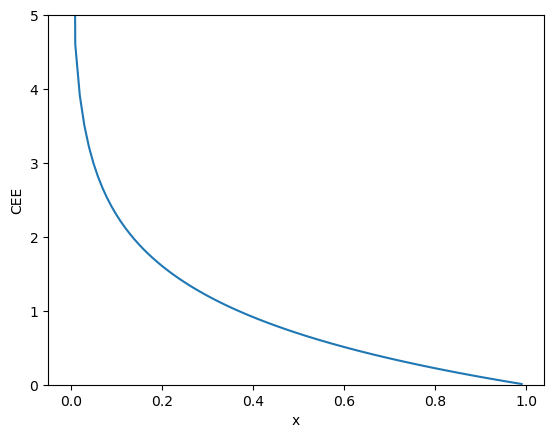

In [20]:
x = np.arange(0, 1.0, 0.01)
y = -np.log(x + 1e-7)

plt.plot(x, y)
plt.ylim(0, 5)
plt.xlabel('x')
plt.ylabel('CEE')

훈련 데이터 모두에 대한 손실함수의 합을 구하는 방법   
    
    
$E = -\frac{1}{N}\sum_n\sum_kt_{nk}logy_{nk}$

모든 데이터셋에 대해서 학습을 진행하기 어려울 때   
-> 미니배치   
데이터 일부를 추려 전체의 근사치로 이용할 수 있다.

In [2]:
import sys, os
sys.path.append('../modules/')
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True, flatten=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [3]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [25]:
# 배치용 교차 엔트로피 오차 
def cross_entropy_error(y, t):
  if y.dim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  batch_size = y.shape[0]
  
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
np.arange()

Gradient Method

In [26]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)
  
  for idx in range(x.size):
    tmp_val = x[idx]
    
    x[idx] = tmp_val + h
    fxh1 = f(x) # f(x+h)
    
    x[idx] = tmp_val - h
    fxh2 = f(x) # f(x-h)
    
    grad[idx] = (fxh1 - fxh2) / 2*h
    x[idx] = tmp_val
    
  return grad

In [1]:
import sys, os
sys.path.append('../modules/')
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)
    
  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    
    return loss

In [2]:
net = simpleNet()
print('W:', net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print('p:', p)
print('arg p:', np.argmax(p))
t = np.array([0, 0, 1])
print('loss :', net.loss(x, t))

W: [[ 0.36757441  1.13464452 -0.83220527]
 [-1.54044972  0.42057485 -1.15950643]]
p: [-1.1658601   1.05930408 -1.54287895]
arg p: 1
loss : 2.7695257992961855


In [4]:
f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.05483998  0.50754415 -0.56238413]
 [ 0.08225997  0.76131622 -0.84357619]]


2층 신경망 클래스 구현

In [5]:
import numpy as np
import sys, os
sys.path.append('../modules/')
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화
    self.params = {}
    
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
    
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    
    a1 = np.dot(x, W1) + b1
    z1 = relu(a1)
    
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    
    return y
  
  def loss(self, x, t):
    y = self.predict(x)
    
    return cross_entropy_error(y, t)
  
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
    
    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy
  
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)
    
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    
    return grads

In [6]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)
